<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/Gradient_descent_for_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

#Using only NumPy, implement batch gradient descent for softmax regression. Train this classifier on the Iris dataset, demonstrating the process without relying on Scikit-learn.

## 1. Load the Iris data as provided in the notebook of the assignment. Add the bias term for every instance (x0 = 1).

In [3]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris(as_frame=True)
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


load the data (take the petal length and petal width).

In [4]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values   # (take the petal length and petal width)
y = iris.target.values

add the bias term for every instance ($x_0 = 1$).

In [5]:
X_with_bias = np.c_[np.ones(X.shape[0]), X] #----- fill here

split the dataset into a training set, a validation set and a test set manually:

In [6]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

## 2. The targets are class indices (0, 1 or 2). They have to turn to class probabilities to train the Softmax Regression model. Each instance must show a probability equal to 0.0 for all classes except for the target class (1.0) (so the class probability vectors should be a one-hot vector). Write a function to convert the vector of class indices to a matrix of one-hot vector for each instance.


In [7]:
def to_one_hot(y):
    y = np.array(y).reshape(-1)
    one_hot = np.eye(3)[y]
    return one_hot


Check with the expected out put to make sure your code is doing the right thing:

In [8]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [9]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

## 3. Normalize the data using Z-Score Normalization and define the softmax function to be used later.

In [11]:
# fill the following lines
mean = np.mean(X_train[:, 1:], axis=0)
std = np.std(X_train[:, 1:], axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std


In [12]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [13]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

In [ ]:
n_inputs

3

## 4. Implement the gradient step using numpy. Make sure about the dimensions and the correctness of your calculations.

turn  the math equations into Python code.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [22]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)


for epoch in range(n_epochs):
    logits = np.dot(X_train, Theta)  # Compute logits
    Y_proba = softmax(logits)  # Compute predicted probabilities

    if epoch % 1000 == 0:
        logits_valid = np.dot(X_valid, Theta)
        Y_proba_valid = softmax(logits_valid)
        xentropy_losses = -np.sum(Y_valid_one_hot * np.log(np.clip(Y_proba_valid, epsilon, 1 - epsilon)), axis=1)
        print(epoch, xentropy_losses.mean())

    error = Y_proba - Y_train_one_hot  # Compute error
    gradients = np.dot(X_train.T, Y_proba - Y_train_one_hot) / len(X)
    Theta = Theta - eta * gradients

0 3.709434892707693
1000 0.15547653283823826
2000 0.14162614911735882
3000 0.13271090878634068
4000 0.1256641433411151
5000 0.12013102826590509


In [23]:
Theta

array([[ 0.27563915,  5.40425127, -4.67375204],
       [-5.76092429, -0.04051629,  6.85618011],
       [-4.67397359, -0.08718461,  6.63833136]])

In [24]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

## 5. Document and plot the results of your model.

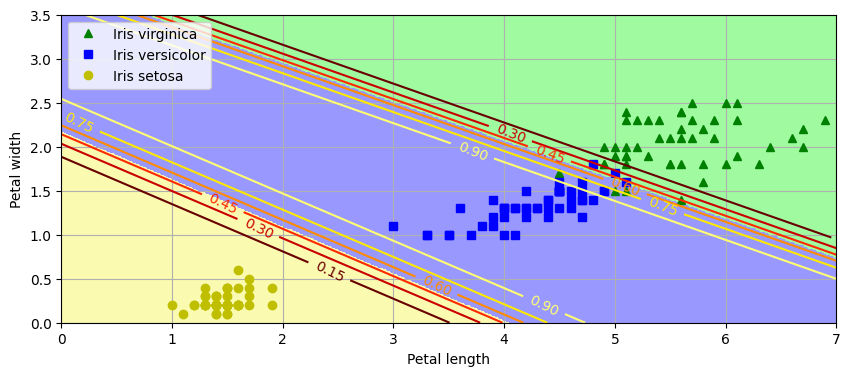

In [25]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = np.dot(X_new_with_bias, Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()